In [7]:
using DelimitedFiles, Plots, PersistenceDiagrams
gr( fmt = :png)

Plots.GRBackend()

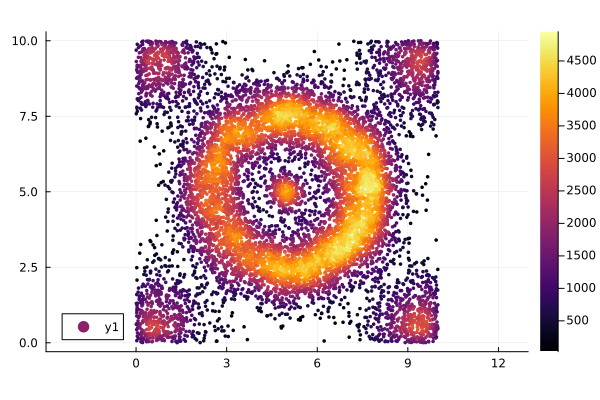

In [37]:
toy = readdlm("ToMaTo/inputs/toy_example_w_density.txt")

scatter(toy[:,1], toy[:,2], marker_z = toy[:,3], aspect_ratio=1, ms=2, markerstrokewidth=0, size(500,500))

In [9]:
run(`./ToMATo/main ToMATo/inputs/toy_example_w_density.txt 0.25 1e20`)

Dimension: 2
Number of input points: 10000
Number of clusters: 0


Process(`./ToMATo/main ToMATo/inputs/toy_example_w_density.txt 0.25 1e20`, ProcessExited(0))

- `0.25` is the value of radius delta (a.k.a. Rips radius) to be used
  in the construction of the neighborhood (Rips) graph.

- `1e20` is the values of the threshold tau on the prominence of the
  clusters to be used for merging clusters. It also serves as a
  threshold on the heights of the peaks, so any cluster of height less
  than tau is treated as background noise.



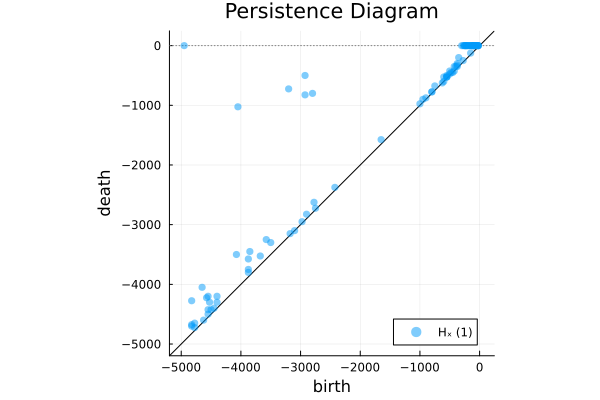

In [29]:
pairs = readdlm("diagram.txt")
pairs .*= -1
intervals = [PersistenceInterval(p...) for p in eachrow(pairs)]
pd = PersistenceDiagram(intervals)
plot(pd)

Dimension: 2
Number of input points: 10000
Number of clusters: 6


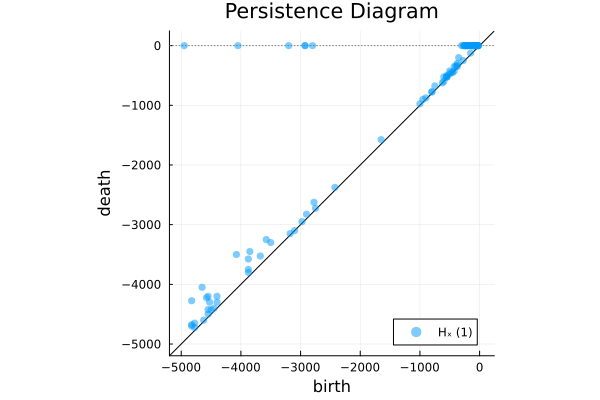

In [32]:
run(`./ToMATo/main ToMATo/inputs/toy_example_w_density.txt 0.25 1e3`)
pairs = readdlm("diagram.txt")
pairs .*= -1
intervals = [PersistenceInterval(p...) for p in eachrow(pairs)]
pd = PersistenceDiagram(intervals)
plot(pd)

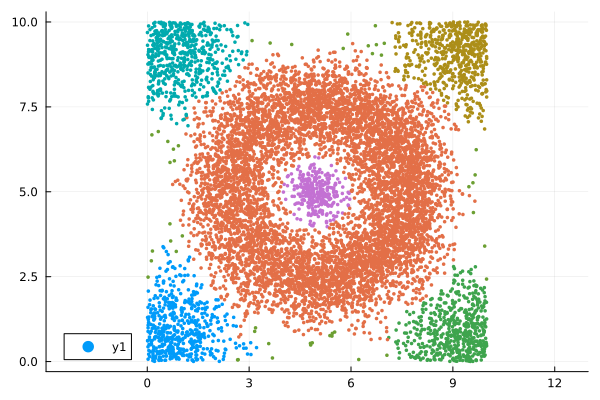

In [34]:
clusters = vec(readdlm("clusters.txt"))
clusters[isnan.(clusters)] .= 0
scatter(toy[:,1], toy[:,2], color = Int.(clusters), aspect_ratio=1, ms=2, markerstrokewidth=0)